In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Tiền xử lý dữ liệu

In [2]:
df = pd.read_csv('Data/GDPlist.csv',decimal= ',', encoding= 'ISO-8859-1')
df

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644
...,...,...,...
120,Uzbekistan,Asia,45353
121,Venezuela,South America,315841
122,Vietnam,Asia,122722
123,Yemen,Africa,33675


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [4]:
df.describe()

,GDP (millions of US$)
count,1.250000e+02
mean,5.554278e+05
std,1.649266e+06
min,1.060000e+04
25%,2.574200e+04
50%,9.608900e+04
75%,3.332380e+05
max,1.509402e+07


In [5]:
# Xử lý ngoại lai
Q1 = df['GDP (millions of US$)'].quantile(q = 0.25)
Q3 = df['GDP (millions of US$)'].quantile(q = 0.75)
IQR  = Q3 - Q1

In [6]:
df2 = df[~((df['GDP (millions of US$)'] < Q1 -1.5*IQR) | (df['GDP (millions of US$)'] > Q3 + 1.5*IQR))]

## 2. Visualization

### 2.1 So sánh GDP các nước ở South America.

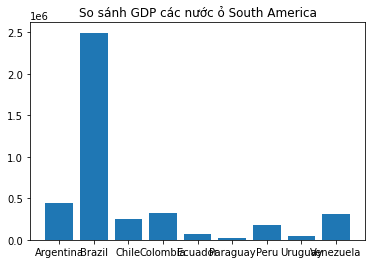

In [7]:
data1 = df[df['Continent'] == 'South America']
plt.bar(x = data1['Country'], height = data1['GDP (millions of US$)'])
plt.rcParams["figure.figsize"] = (15,5)
plt.title('So sánh GDP các nước ỏ South America')
plt.show()

### 2.2 Đánh giá tỉ lệ đóng góp GDP của Việt Nam trên tổng số GDP của 5 nước Đông Nam Á là Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.

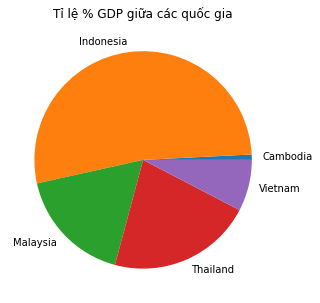

In [8]:
listCountry = ['Vietnam' , 'Indonesia' , 'Cambodia'  , 'Thailand' , 'Malaysia']
data2 = df[df['Country'].isin(listCountry)]
plt.pie(x = data2['GDP (millions of US$)'], labels = data2.Country)
plt.title('Tỉ lệ % GDP giữa các quốc gia')
plt.show()

### Nhận xét:
- Indonesia chiếm tỷ lệ GDP cao nhất, hơn 50 % các nước
- Cambodia chiếm tỷ lệ khá thấp so với các nước còn lại
- Việt Nam, Thái Lan, Malaysia có chênh lệch nhưng không quá đáng kể